In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d505f23e7b96bc2e3d68fe1051331f1


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | flinders
Processing Record 10 of Set 1 | haines junction
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | ouagadougou
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | kasane
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | lensk
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | ramgarh
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | portland
Processing Record 23 of Set 1 | verkhoyansk
Processing Record 24 of

Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | molfetta
Processing Record 44 of Set 4 | maldonado
Processing Record 45 of Set 4 | okhotsk
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | cap malheureux
Processing Record 48 of Set 4 | bukama
Processing Record 49 of Set 4 | vokhtoga
Processing Record 50 of Set 4 | goderich
Processing Record 1 of Set 5 | yining
Processing Record 2 of Set 5 | carolina
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | kaputa
Processing Record 5 of Set 5 | huilong
Processing Record 6 of Set 5 | lagoa
Processing Record 7 of Set 5 | tasiilaq
Processing Record 8 of Set 5 | hobart
Processing Record 9 of Set 5 | butaritari
Processing Record 10 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 5 | brenham
Processing Record 12 of Set 5 | lebu
Processing Record 13 of Set 5 | brufut
Processing Record 14 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 1

Processing Record 32 of Set 8 | karlstad
Processing Record 33 of Set 8 | barentu
Processing Record 34 of Set 8 | miyazu
Processing Record 35 of Set 8 | riyadh
Processing Record 36 of Set 8 | suzu
City not found. Skipping...
Processing Record 37 of Set 8 | finschhafen
Processing Record 38 of Set 8 | uwayl
City not found. Skipping...
Processing Record 39 of Set 8 | west plains
Processing Record 40 of Set 8 | havoysund
Processing Record 41 of Set 8 | safaga
Processing Record 42 of Set 8 | kieta
Processing Record 43 of Set 8 | dhanwar
Processing Record 44 of Set 8 | placido de castro
Processing Record 45 of Set 8 | satun
Processing Record 46 of Set 8 | yanan
City not found. Skipping...
Processing Record 47 of Set 8 | marau
Processing Record 48 of Set 8 | olafsvik
Processing Record 49 of Set 8 | praia
Processing Record 50 of Set 8 | tomatlan
Processing Record 1 of Set 9 | coos bay
Processing Record 2 of Set 9 | sataua
City not found. Skipping...
Processing Record 3 of Set 9 | tagusao
Proces

Processing Record 15 of Set 12 | codrington
Processing Record 16 of Set 12 | mocuba
Processing Record 17 of Set 12 | sambava
Processing Record 18 of Set 12 | gayny
Processing Record 19 of Set 12 | qianan
Processing Record 20 of Set 12 | dzilam gonzalez
Processing Record 21 of Set 12 | saint-pierre
Processing Record 22 of Set 12 | baghmara
Processing Record 23 of Set 12 | celestun
Processing Record 24 of Set 12 | big rapids
Processing Record 25 of Set 12 | berezovyy
Processing Record 26 of Set 12 | geelong
Processing Record 27 of Set 12 | rawson
Processing Record 28 of Set 12 | along
Processing Record 29 of Set 12 | kahului
Processing Record 30 of Set 12 | ketchikan
Processing Record 31 of Set 12 | saint-leu
Processing Record 32 of Set 12 | kolyvan
Processing Record 33 of Set 12 | koutsouras
Processing Record 34 of Set 12 | glendive
Processing Record 35 of Set 12 | portree
Processing Record 36 of Set 12 | kingston
Processing Record 37 of Set 12 | takoradi
Processing Record 38 of Set 12 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,-11.58,82,75,1.99,CA,2021-11-24 16:15:51
1,Ushuaia,-54.8000,-68.3000,51.01,53,95,4.27,AR,2021-11-24 16:13:29
2,Avarua,-21.2078,-159.7750,73.45,78,75,3.44,CK,2021-11-24 16:15:16
3,Tiksi,71.6872,128.8694,-18.09,97,38,6.89,RU,2021-11-24 16:15:51
4,Sao Filipe,14.8961,-24.4956,79.52,68,36,3.53,CV,2021-11-24 16:15:52
5,Torbay,47.6666,-52.7314,48.76,98,90,21.85,CA,2021-11-24 16:15:52
6,Bengkulu,-3.8004,102.2655,76.46,78,96,3.42,ID,2021-11-24 16:15:52
7,Vaini,-21.2000,-175.2000,69.96,100,20,0.00,TO,2021-11-24 16:15:53
8,Flinders,-34.5833,150.8552,70.05,93,100,1.01,AU,2021-11-24 16:15:53
9,Haines Junction,60.7522,-137.5108,-4.05,84,100,1.14,CA,2021-11-24 16:15:54


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-11-24 16:15:51,62.4560,-114.3525,-11.58,82,75,1.99
1,Ushuaia,AR,2021-11-24 16:13:29,-54.8000,-68.3000,51.01,53,95,4.27
2,Avarua,CK,2021-11-24 16:15:16,-21.2078,-159.7750,73.45,78,75,3.44
3,Tiksi,RU,2021-11-24 16:15:51,71.6872,128.8694,-18.09,97,38,6.89
4,Sao Filipe,CV,2021-11-24 16:15:52,14.8961,-24.4956,79.52,68,36,3.53
...,...,...,...,...,...,...,...,...,...
567,Ormara,PK,2021-11-24 16:31:59,25.2088,64.6357,78.40,58,0,6.04
568,Marzuq,YE,2021-11-24 16:32:00,14.4000,46.4667,69.12,17,12,3.13
569,Barrie,CA,2021-11-24 16:30:21,44.4001,-79.6663,42.57,76,99,9.22
570,Pacifica,US,2021-11-24 16:30:58,37.6138,-122.4869,58.12,63,20,1.99


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

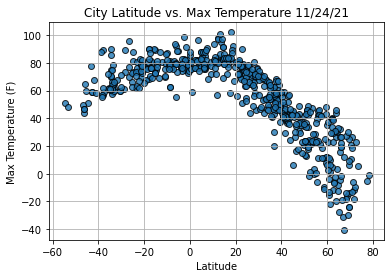

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

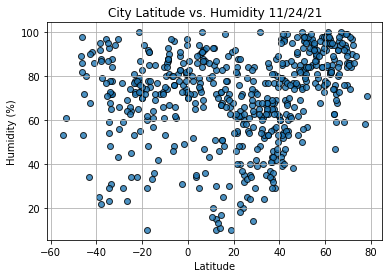

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

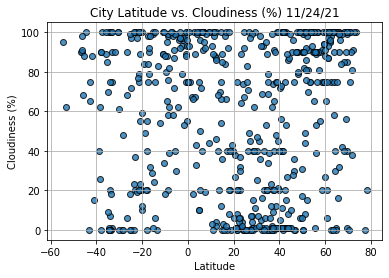

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

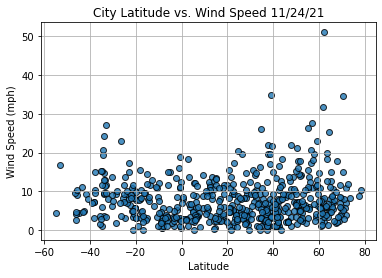

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13


City                    Mahebourg
Country                        MU
Date          2021-11-24 16:15:55
Lat                      -20.4081
Lng                          57.7
Max Temp                    77.29
Humidity                       73
Cloudiness                     20
Wind Speed                   5.75
Name: 13, dtype: object

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

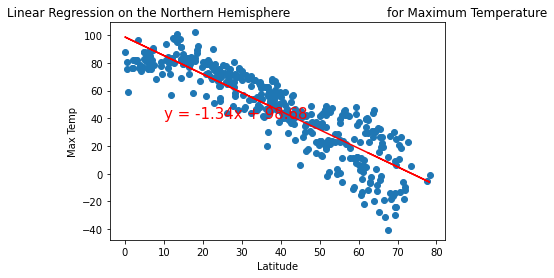

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

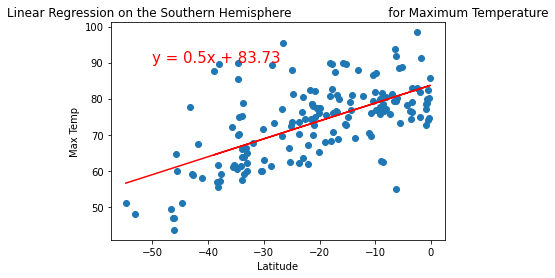

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

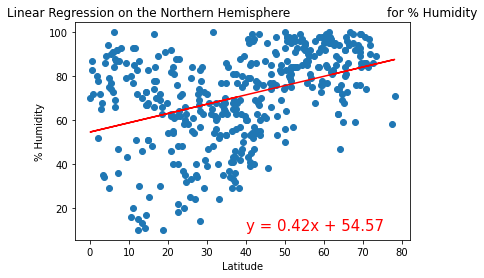

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

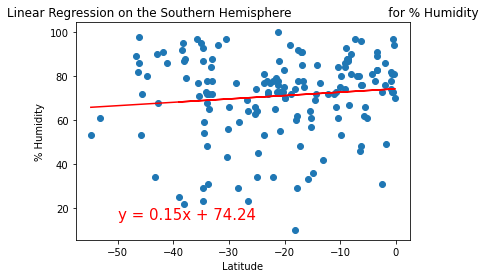

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

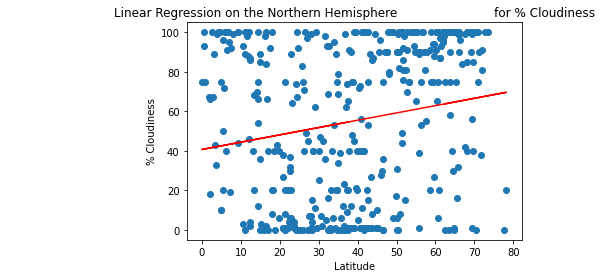

In [27]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

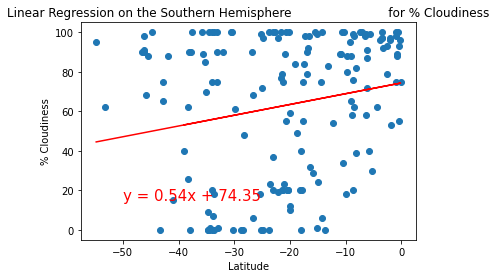

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

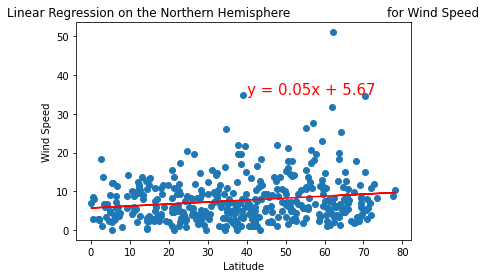

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

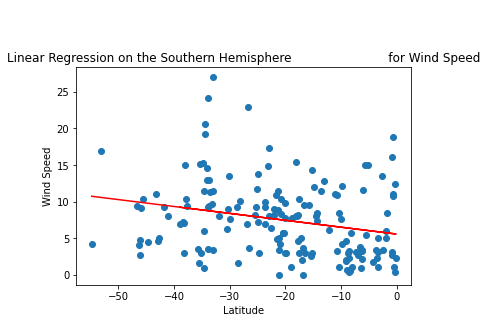

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))